<a href="https://colab.research.google.com/github/abol-hasan/HousepricesPrediction_FeatureEngineering_DataAnalysis/blob/main/Houseprice_feature_selection_train.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import joblib
import matplotlib.pyplot as plt 
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import mean_squared_error, r2_score


In [ ]:
x_train = pd.read_csv('/content/drive/MyDrive/hauspricefolder/xtrain.csv')
x_test = pd.read_csv('/content/drive/MyDrive/hauspricefolder/xtest.csv')
y_train = pd.read_csv('/content/drive/MyDrive/hauspricefolder/ytrain.csv')
y_test = pd.read_csv('/content/drive/MyDrive/hauspricefolder/ytest.csv')

In [ ]:
x_train.shape

(1314, 81)

In [ ]:
x_train

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,...,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,SaleType,SaleCondition,LotFrontage_missval,MasVnrArea_missval,GarageYrBlt_missval
0,0.750000,0.75,0.461171,0.0,1.0,1.0,0.333333,1.000000,1.0,0.0,0.0,0.863636,0.4,1.0,0.75,0.6,0.777778,0.50,0.014706,0.049180,0.0,0.0,1.0,1.0,0.333333,0.000000,0.666667,0.5,1.0,0.666667,0.666667,0.666667,1.0,0.002835,0.0,0.0,0.673479,0.239935,1.0,1.00,...,1.0,0.559760,0.000000,0.0,0.523250,0.000000,0.0,0.666667,0.0,0.375,0.333333,0.666667,0.416667,1.00,0.000000,0.0,0.75,0.018692,1.0,0.75,0.430183,0.5,0.5,1.0,0.116686,0.032907,0.0,0.0,0.0,0.0,0.0,0.00,1.0,0.0,0.545455,0.666667,0.75,0.0,0.0,0.0
1,0.750000,0.75,0.456066,0.0,1.0,1.0,0.333333,0.333333,1.0,0.0,0.0,0.363636,0.4,1.0,0.75,0.6,0.444444,0.75,0.360294,0.049180,0.0,0.0,0.6,0.6,0.666667,0.033750,0.666667,0.5,0.5,0.333333,0.666667,0.000000,0.8,0.142807,0.0,0.0,0.114724,0.172340,1.0,1.00,...,1.0,0.434539,0.000000,0.0,0.406196,0.333333,0.0,0.333333,0.5,0.375,0.333333,0.666667,0.250000,1.00,0.000000,0.0,0.75,0.457944,0.5,0.25,0.220028,0.5,0.5,1.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.75,1.0,0.0,0.636364,0.666667,0.75,0.0,0.0,0.0
2,0.916667,0.75,0.394699,0.0,1.0,1.0,0.000000,0.333333,1.0,0.0,0.0,0.954545,0.4,1.0,1.00,0.6,0.888889,0.50,0.036765,0.098361,1.0,0.0,0.3,0.2,0.666667,0.257500,1.000000,0.5,1.0,1.000000,0.666667,0.000000,1.0,0.080794,0.0,0.0,0.601951,0.286743,1.0,1.00,...,1.0,0.627205,0.000000,0.0,0.586296,0.333333,0.0,0.666667,0.0,0.250,0.333333,1.000000,0.333333,1.00,0.333333,0.8,0.75,0.046729,0.5,0.50,0.406206,0.5,0.5,1.0,0.228705,0.149909,0.0,0.0,0.0,0.0,0.0,0.00,1.0,0.0,0.090909,0.666667,0.75,0.0,0.0,0.0
3,0.750000,0.75,0.445002,0.0,1.0,1.0,0.666667,0.666667,1.0,0.0,0.0,0.454545,0.4,1.0,0.75,0.6,0.666667,0.50,0.066176,0.163934,0.0,0.0,1.0,1.0,0.333333,0.000000,0.666667,0.5,1.0,0.666667,0.666667,1.000000,1.0,0.255670,0.0,0.0,0.018114,0.242553,1.0,1.00,...,1.0,0.566920,0.000000,0.0,0.529943,0.333333,0.0,0.666667,0.0,0.375,0.333333,0.666667,0.250000,1.00,0.333333,0.4,0.75,0.084112,0.5,0.50,0.362482,0.5,0.5,1.0,0.469078,0.045704,0.0,0.0,0.0,0.0,0.0,0.00,1.0,0.0,0.636364,0.666667,0.75,1.0,0.0,0.0
4,0.750000,0.75,0.577658,0.0,1.0,1.0,0.333333,0.333333,1.0,0.0,0.0,0.363636,0.4,1.0,0.75,0.6,0.555556,0.50,0.323529,0.737705,0.0,0.0,0.6,0.7,0.666667,0.170000,0.333333,0.5,0.5,0.333333,0.666667,0.000000,0.6,0.086818,0.0,0.0,0.434278,0.233224,1.0,0.75,...,1.0,0.549026,0.000000,0.0,0.513216,0.000000,0.0,0.666667,0.0,0.375,0.333333,0.333333,0.416667,1.00,0.333333,0.8,0.75,0.411215,0.5,0.50,0.406206,0.5,0.5,1.0,0.000000,0.000000,0.0,1.0,0.0,0.0,0.0,0.00,1.0,0.0,0.545455,0.666667,0.75,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1309,1.000000,0.75,0.504203,0.0,1.0,1.0,0.000000,0.333333,1.0,0.0,0.0,1.000000,0.4,1.0,0.75,1.0,0.777778,0.50,0.073529,0.180328,0.0,0.0,1.0,1.0,0.666667,0.420625,0.666667,0.5,1.0,0.666667,0.666667,0.333333,1.0,0.206060,0.0,0.0,0.041338,0.204910,1.0,1.00,...,1.0,0.504851,0.586004,0.0,0.692428,0.3333

In [ ]:
y_test.shape, x_test.shape

((146, 1), (146, 81))

In [ ]:
# feature selection
selector = SelectFromModel(estimator=Lasso(alpha=0.001, random_state=0)).fit(x_train, y_train)

In [ ]:
# taking the sum of selected features
selector.get_support().sum()

36

In [ ]:
# showing the mask of features
selector.get_support()

array([ True,  True,  True, False, False, False,  True,  True, False,
        True, False,  True, False, False, False, False,  True,  True,
       False,  True,  True, False,  True, False, False, False,  True,
       False,  True,  True, False,  True,  True, False, False, False,
       False, False, False,  True,  True, False,  True,  True, False,
        True,  True, False, False,  True, False, False,  True,  True,
        True,  True,  True, False, False,  True,  True,  True, False,
       False,  True,  True, False, False, False,  True, False, False,
       False, False, False, False, False,  True, False, False, False])

In [ ]:
# Feature which through SelectfromModel is selected
feature_selected = x_train.columns[selector.get_support()]
feature_selected

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotShape', 'LandContour',
       'LotConfig', 'Neighborhood', 'OverallQual', 'OverallCond',
       'YearRemodAdd', 'RoofStyle', 'Exterior1st', 'ExterQual', 'Foundation',
       'BsmtQual', 'BsmtExposure', 'BsmtFinType1', 'HeatingQC', 'CentralAir',
       '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'HalfBath',
       'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces',
       'FireplaceQu', 'GarageFinish', 'GarageCars', 'GarageArea', 'PavedDrive',
       'WoodDeckSF', 'ScreenPorch', 'SaleCondition'],
      dtype='object')

In [ ]:
selector.estimator_.coef_

array([ 0.03962656,  0.10524603,  0.00491007,  0.        ,  0.        ,
        0.        ,  0.02031931,  0.00886523,  0.        ,  0.02443736,
        0.        ,  0.24923169,  0.        ,  0.        , -0.        ,
       -0.        ,  0.46945041,  0.28749155, -0.        , -0.01991692,
        0.014472  , -0.        ,  0.02216444,  0.        ,  0.        ,
        0.        ,  0.0190256 ,  0.        ,  0.03124918,  0.07560136,
        0.        ,  0.05338541,  0.0586981 ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.04266624,
        0.06646204, -0.        ,  0.38326678,  0.02840298, -0.        ,
        0.82389888,  0.09678501,  0.        ,  0.        ,  0.03540975,
        0.        , -0.        ,  0.08241905,  0.0466849 ,  0.06404286,
        0.01865078,  0.05455398,  0.        ,  0.        ,  0.0128951 ,
        0.18728738,  0.00628161,  0.        ,  0.        ,  0.01645242,
        0.04327071,  0.        ,  0.        ,  0.        ,  0.03

In [ ]:
print(f'shape of original x_train:{x_train.shape}')
print(f'shape of selected features:{feature_selected.shape}')
print(f'sum of features with zero coeficient:{(selector.estimator_.coef_== 0).sum()}')

shape of original x_train:(1314, 81)
shape of selected features:(36,)
sum of features with zero coeficient:45


In [ ]:
#pd.Series(feature_selected).to_csv('/content/drive/MyDrive/hauspricefolder/feature_selec.csv', index=False)

In [ ]:
#feature_sel = pd.read_csv('/content/drive/MyDrive/hauspricefolder/feature_selec.csv')
#feature_sel['0'].to_list()

In [ ]:
# reduce to new trainset and testset with new features
x_train = x_train[feature_selected]
x_test = x_test[feature_selected]

In [ ]:
[col for col in x_train.columns if x_train[col].isnull().sum() > 0]

[]

In [ ]:
# build model
clf = Lasso(alpha=0.001, random_state=0)
clf.fit(x_train, y_train)

Lasso(alpha=0.001, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=0,
      selection='cyclic', tol=0.0001, warm_start=False)

In [ ]:
pred_lasso = clf.predict(x_train)

print(f'for train -> mean sqaure error:{mean_squared_error(np.exp(y_train), np.exp(pred_lasso))}')
print(f'for train -> root mean sqaure error:{mean_squared_error(y_true=np.exp(y_train), y_pred=np.exp(pred_lasso), squared=False)}')
print(f'for train -> r2_score:{r2_score(np.exp(y_train), np.exp(pred_lasso))}')

pred_lasso_test = clf.predict(x_test)
print(f'for test -> mean sqaure error:{mean_squared_error(np.exp(y_test), np.exp(pred_lasso_test))}')
print(f'for test -> root mean sqaure error:{mean_squared_error(np.exp(y_test), np.exp(pred_lasso_test), squared=False)}')
print(f'for test -> r2_score:{r2_score(np.exp(y_test), np.exp(pred_lasso_test))}')

for train -> mean sqaure error:781396538.4763545
for train -> root mean sqaure error:27953.47095579285
for train -> r2_score:0.8748530463468015
for test -> mean sqaure error:1060767982.7072532
for test -> root mean sqaure error:32569.433257384957
for test -> r2_score:0.8456417073258417


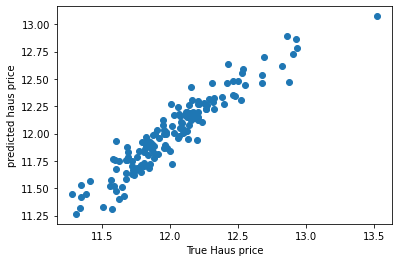

In [ ]:
plt.scatter(y_test, pred_lasso_test)
plt.xlabel('True Haus price')
plt.ylabel('predicted haus price')
plt.show()

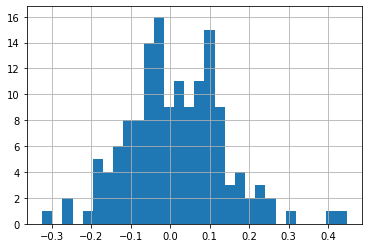

In [ ]:
# difference between y_true and y_prediction
diff = y_test['SalePrice'] - pred_lasso_test
diff.hist(bins=30)
plt.show()

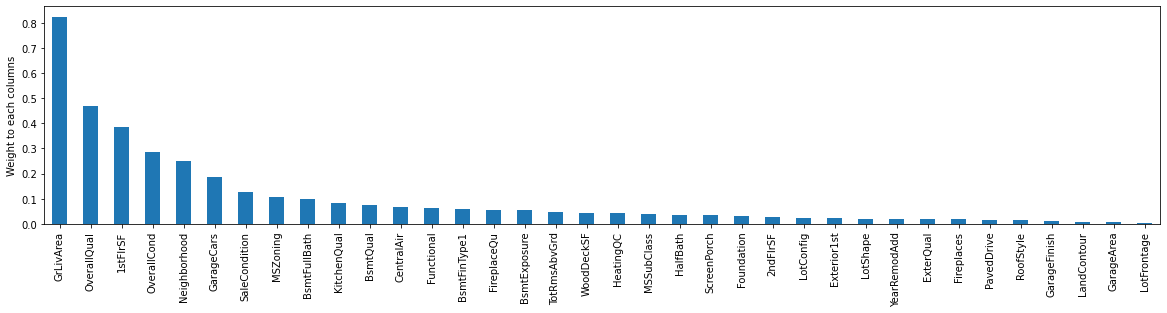

In [ ]:
# displaying the importance which is given by Lasso
weight_to_features = pd.Series(np.abs(clf.coef_))
weight_to_features.index = x_train.columns
a = weight_to_features.sort_values(ascending=False)
plt.figure(figsize=(20,4))
a.plot.bar()
plt.ylabel('Weight to each columns')
plt.show()

In [ ]:
joblib.dump(clf, '/content/drive/MyDrive/hauspricefolder/LinearModel_Lasso.joblib')

['/content/drive/MyDrive/hauspricefolder/LinearModel_Lasso.joblib']